In [ ]:
# Import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

In [ ]:
# Loading the dataset

data = pd.read_excel('/content/compiled_risk_data - Copy.xlsx')

# Display the first five rows of the dataframe
data.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,0.0,0.0,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,0.0,1.0,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,0.0,1.0,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,0.0,1.0,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,0.0,0.0,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
data.columns

Index(['project_name', 'Smart contract address', 'Blog post link',
       'Audit website', 'Chain', 'Is_closed_source', 'hidden_owner',
       'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax',
       'sell_tax', 'slippage_modifiable', 'Is_blacklisted',
       'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam',
       'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token',
       'illegal_unicode', 'exploitation', 'bad_contract',
       'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')

In [ ]:
data_new = data.copy()
feature_1 = 'exploitation'
feature_2 = 'buy_tax'
feature_3 = 'sell_tax'
feature_4 = 'bad_contract'

selected_features = data_new[[feature_1, feature_2, feature_3, feature_4]].replace({True:1, False:0})
print("Features selected for clustering")
print(selected_features.head())

Features selected for clustering
   exploitation  buy_tax  sell_tax  bad_contract
0             1        0         0           1.0
1             0        1         0           1.0
2             1        0         0           0.0
3             1        0         1           0.0
4             1        0         0           0.0


<ipython-input-21-e38dd2a6f145>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selected_features = data_new[[feature_1, feature_2, feature_3, feature_4]].replace({True:1, False:0})


In [ ]:
from scipy.spatial.distance import pdist, squareform

distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)  # Convert to square matrix

In [ ]:
import scipy.cluster.hierarchy as sch

# Create linkage matrix
linkage_matrix = sch.linkage(distance_matrix, method='ward')

In [ ]:
linkage_matrix

array([[0.00000000e+00, 9.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 6.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.91800000e+03, 1.92900000e+03, 8.51207275e+00, 4.20000000e+02],
       [1.92800000e+03, 1.93000000e+03, 9.11683223e+00, 5.68000000e+02],
       [1.91600000e+03, 1.93100000e+03, 1.94070930e+01, 9.67000000e+02]])

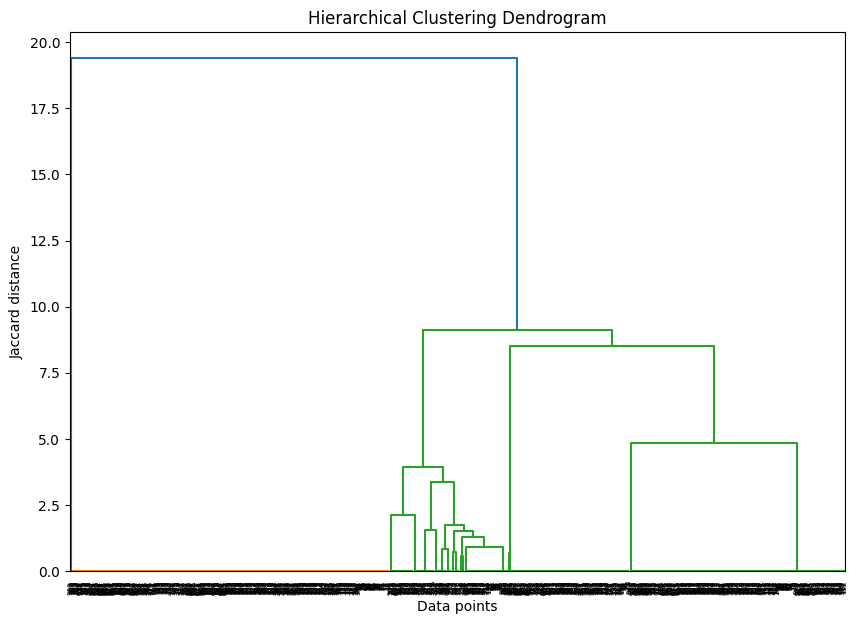

In [ ]:
# Plot the dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()

In [ ]:
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')
data_new['cluster'] = cluster_labels
cluster_summary = data_new[[feature_1, feature_2, feature_3, feature_4, 'cluster']].groupby(['cluster']).agg(['mean','std','median','count'])
cluster_summary

exploitation                          buy_tax                         \
                mean       std median count      mean       std median count   
cluster                                                                        
1           0.000000  0.000000    0.0   399  0.000000  0.000000    0.0   399   
2           0.527027  0.500964    1.0   148  0.790541  0.408305    1.0   148   
3           1.000000  0.000000    1.0   151  0.000000  0.000000    0.0   151   
4           0.773234  0.419520    1.0   269  0.000000  0.000000    0.0   269   

         sell_tax                        bad_contract                         
             mean       std median count         mean       std median count  
cluster                                                                       
1        0.000000  0.000000    0.0   399     0.000000  0.000000    0.0   399  
2        0.804054  0.398275    1.0   148     0.533784  0.500551    1.0   148  
3        0.000000  0.000000    0.0   151     0.000000  0.000000    0.0   150  
4        0.000000  0.000000    0.0   269     1.000000  0.000000    1.0   269

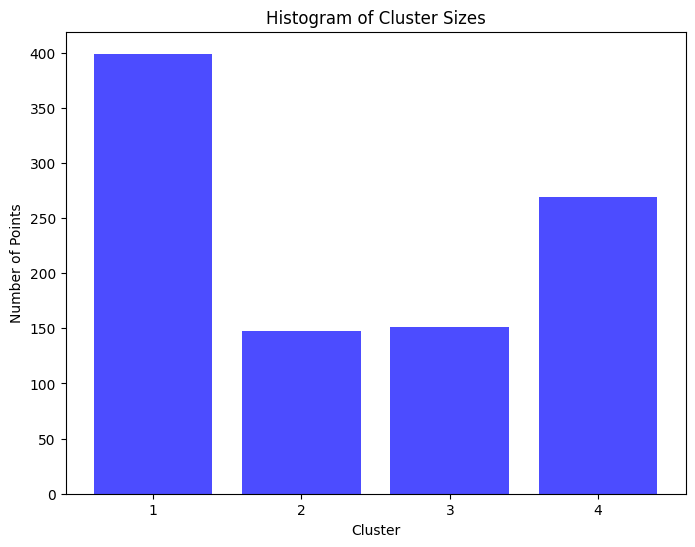

In [ ]:
# Plot histogram of cluster labels to see distribution of cluster sizes
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

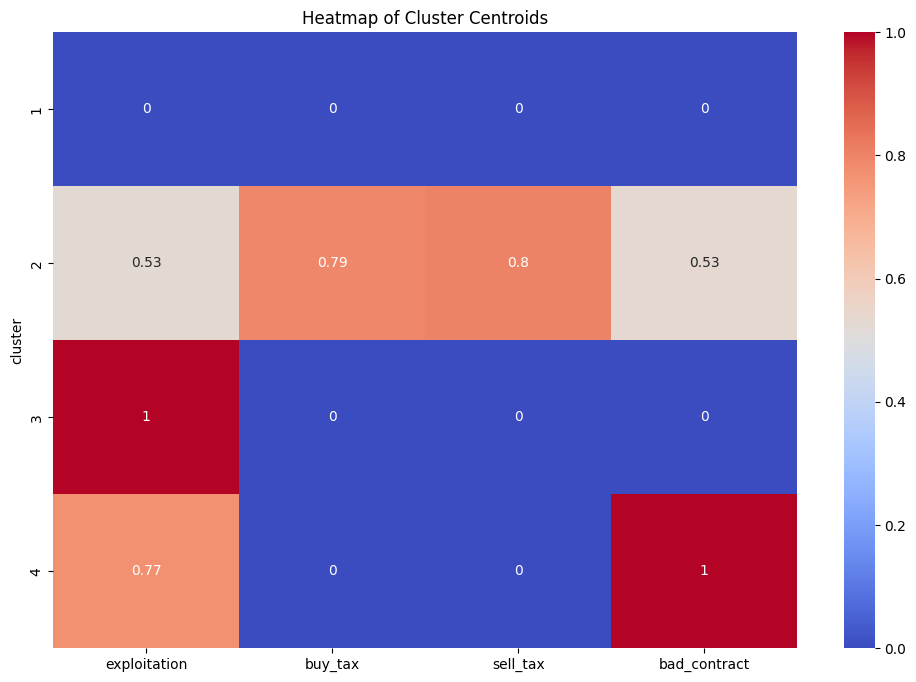

In [ ]:
# Calculate the mean for each cluster and feature
cluster_centers = data_new[[feature_1, feature_2, feature_3,feature_4,'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()